<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Credit_Card_fradulent_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/Credit%20card%20data.csv")
df

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,5149055,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,5149729,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,5149838,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [ ]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


1. Basic Cleaning

In [ ]:
df = df.drop(['ID'] , axis=1)

In [ ]:
df.isnull().sum()

,0
Gender,0
Own_car,0
Own_property,0
Work_phone,0
Phone,0
Email,0
Unemployed,0
Num_children,0
Num_family,0
Account_length,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    # Display unique values if there are not too many, otherwise show value counts
    if df[col].nunique() < 20:
        print(df[col].unique())
    else:
        print(df[col].value_counts().head())
    print("-" * 20)

Unique values in column 'Gender':
[1 0]
--------------------
Unique values in column 'Own_car':
[1 0]
--------------------
Unique values in column 'Own_property':
[1 0]
--------------------
Unique values in column 'Work_phone':
[1 0]
--------------------
Unique values in column 'Phone':
[0 1]
--------------------
Unique values in column 'Email':
[0 1]
--------------------
Unique values in column 'Unemployed':
[0 1]
--------------------
Unique values in column 'Num_children':
[ 0  1  3  2  4  5 14 19  7]
--------------------
Unique values in column 'Num_family':
[ 2  1  5  3  4  6 15  7 20  9]
--------------------
Unique values in column 'Account_length':
Account_length
11    219
13    216
7     215
16    212
5     211
Name: count, dtype: int64
--------------------
Unique values in column 'Total_income':
Total_income
135000.0    1139
180000.0     845
112500.0     843
157500.0     829
225000.0     750
Name: count, dtype: int64
--------------------
Unique values in column 'Age':
Age
28.54

In [ ]:
df_encoded = df.copy()

income_mapping = {
    'Working': 0,
    'Commercial associate': 1,
    'Pensioner': 2,
    'State servant': 3,
    'Student': 4
}

education_mapping = {
    'Secondary / secondary special': 0,
    'Incomplete higher': 1,
    'Higher education': 2,
    'Lower secondary': 3,
    'Academic degree': 4
}

family_mapping = {
    'Married': 0,
    'Single / not married': 1,
    'Civil marriage': 2,
    'Separated': 3,
    'Widow': 4
}

housing_mapping = {
    'House / apartment': 0,
    'Rented apartment': 1,
    'With parents': 2,
    'Municipal apartment': 3,
    'Co-op apartment': 4,
    'Office apartment': 5
}

# Apply label encodings to the other categorical columns
df_encoded['Income_type'] = df_encoded['Income_type'].map(income_mapping)
df_encoded['Education_type'] = df_encoded['Education_type'].map(education_mapping)
df_encoded['Family_status'] = df_encoded['Family_status'].map(family_mapping)
df_encoded['Housing_type'] = df_encoded['Housing_type'].map(housing_mapping)

# Apply frequency encoding to Occupation_type
occupation_freq = df['Occupation_type'].value_counts()
df_encoded['Occupation_type'] = df_encoded['Occupation_type'].map(occupation_freq)


In [ ]:
df_encoded.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,0,2,2,1,2994,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,0,0,0,0,182,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,1,0,1,0,959,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,2,2,3,0,2994,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,0,2,0,0,300,0


Instead of mapping function one can also use one hot encode. Both have same functionality

In [ ]:
#df_encoded = df.copy()

# Frequency encoding for Occupation_type
#occupation_freq = df_encoded['Occupation_type'].value_counts(normalize=True)
#df_encoded['Occupation_type'] = df_encoded['Occupation_type'].map(occupation_freq)

#  One-hot encoding for categorical columns
#categorical_cols = ['Income_type', 'Education_type', 'Family_status', 'Housing_type']

#df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)


#df_encoded.head()


2. Feature Visualization

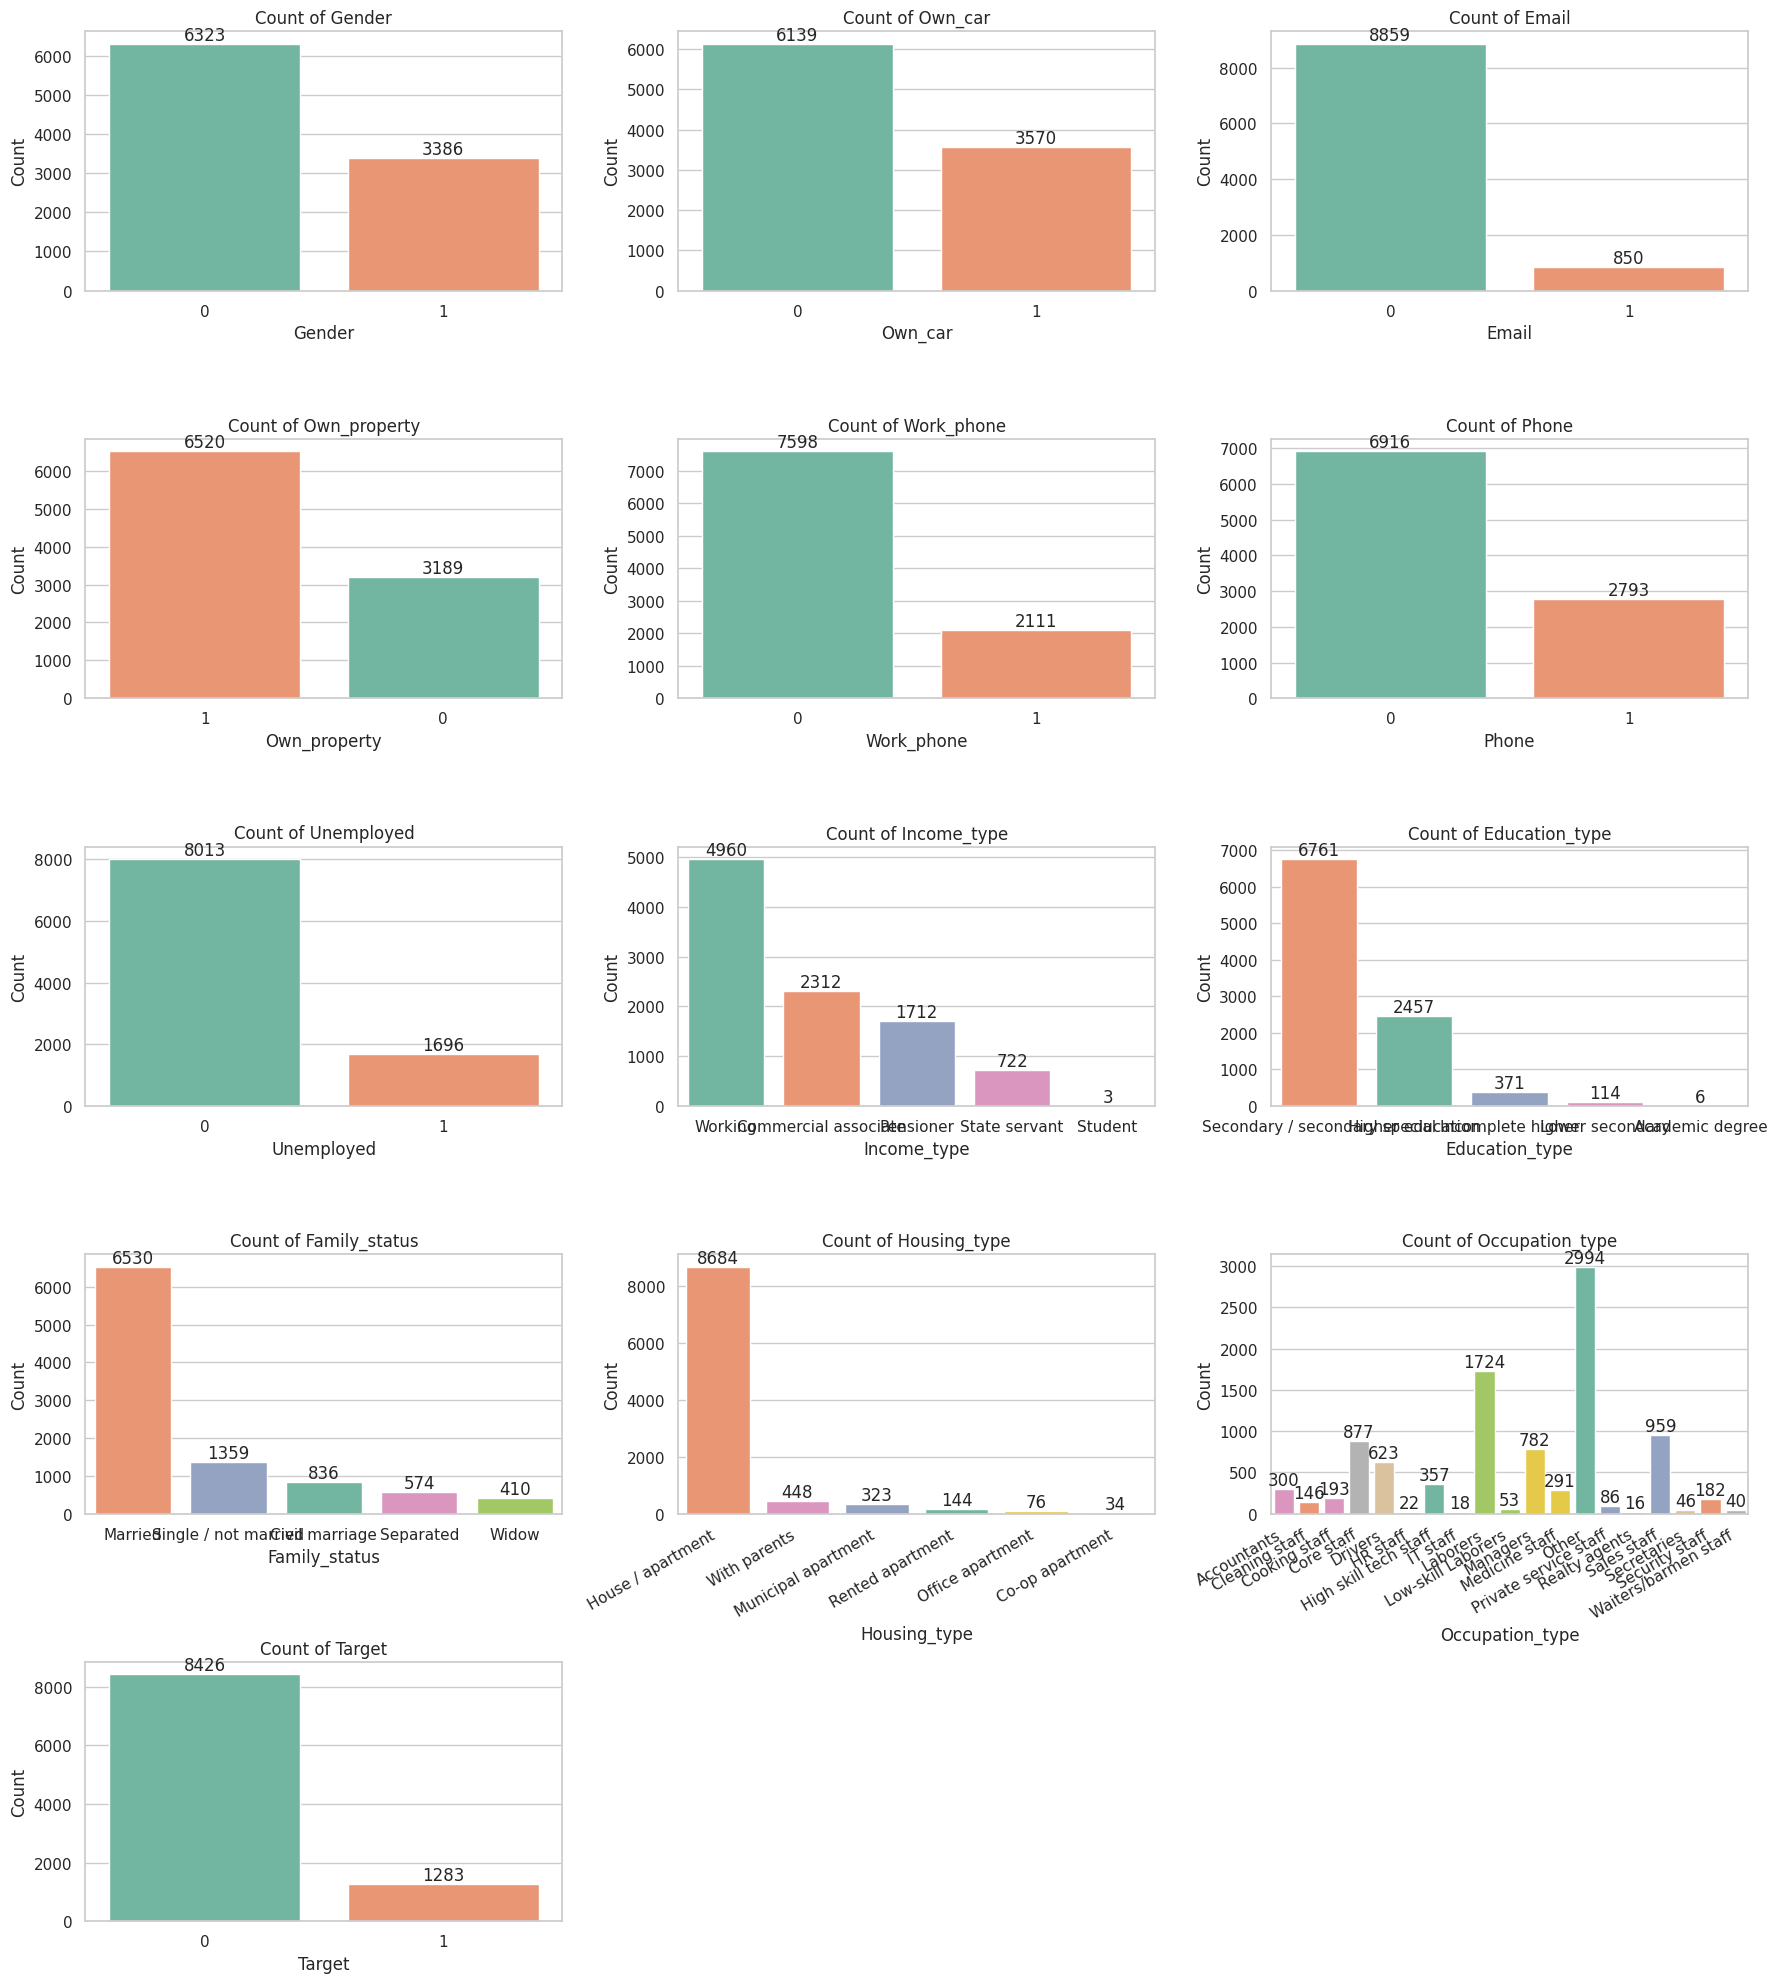

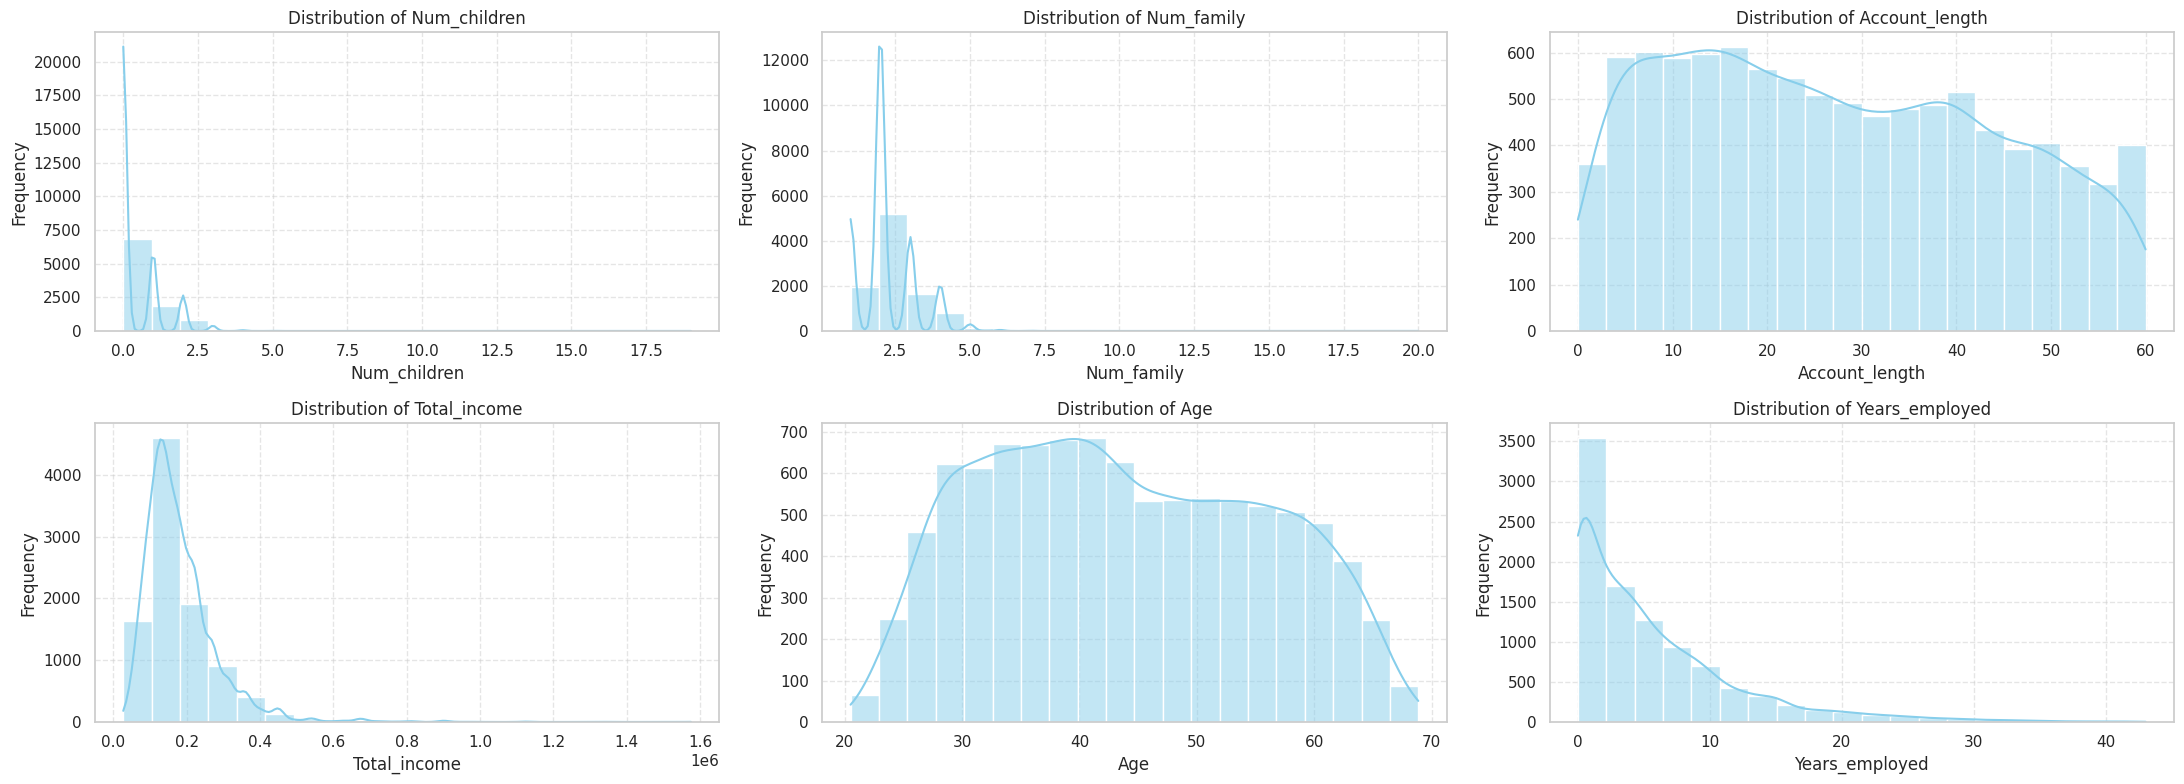

In [ ]:
sns.set(style="whitegrid")


categorical_cols = [
    'Gender', 'Own_car', 'Email' , 'Own_property', 'Work_phone', 'Phone',
    'Unemployed', 'Income_type', 'Education_type', 'Family_status',
    'Housing_type', 'Occupation_type', 'Target'
]

n_cat = len(categorical_cols)
ncols = 3
nrows = (n_cat + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    order = df[col].value_counts().index if df[col].nunique() < 10 else sorted(df[col].unique())
    ax = axes[i]
    sns.countplot(data=df, x=col, hue=col, order=order, ax=ax, palette="Set2", legend=False)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    if df[col].nunique() > 5:
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')  # <--- Updated line

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

numerical_cols = [
    'Num_children', 'Num_family', 'Account_length', 'Total_income',
    'Age', 'Years_employed'
]

n_num = len(numerical_cols)
ncols_num = 3
nrows_num = (n_num + ncols_num - 1) // ncols_num

fig, axes = plt.subplots(nrows_num, ncols_num, figsize=(22, nrows_num * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col].dropna(), bins=20, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observation:
Most categorical features have balanced distributions except:
'Email' → ~90% have no email → very low variance → drop
Others show adequate variation and can be kept.
Numerical columns vary well; no removals needed.

In [ ]:
df = df.drop(['Email'], axis=1)

3. Spearman or Pearson Correlation

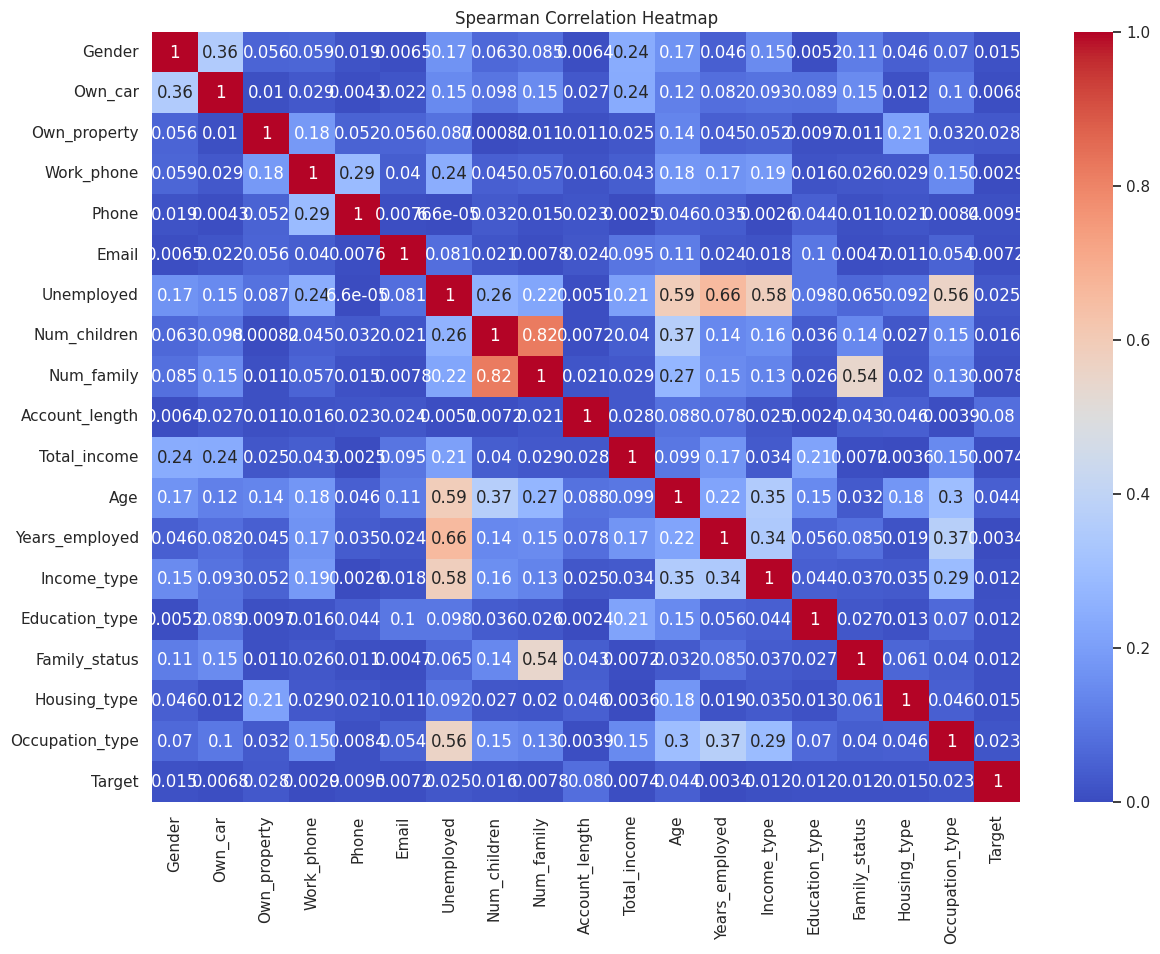

In [ ]:
corr_matrix = df_encoded.corr('spearman').abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Spearman| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

Highly correlated pairs (|Spearman| > 0.8):
Num_family and Num_children: correlation = 0.82


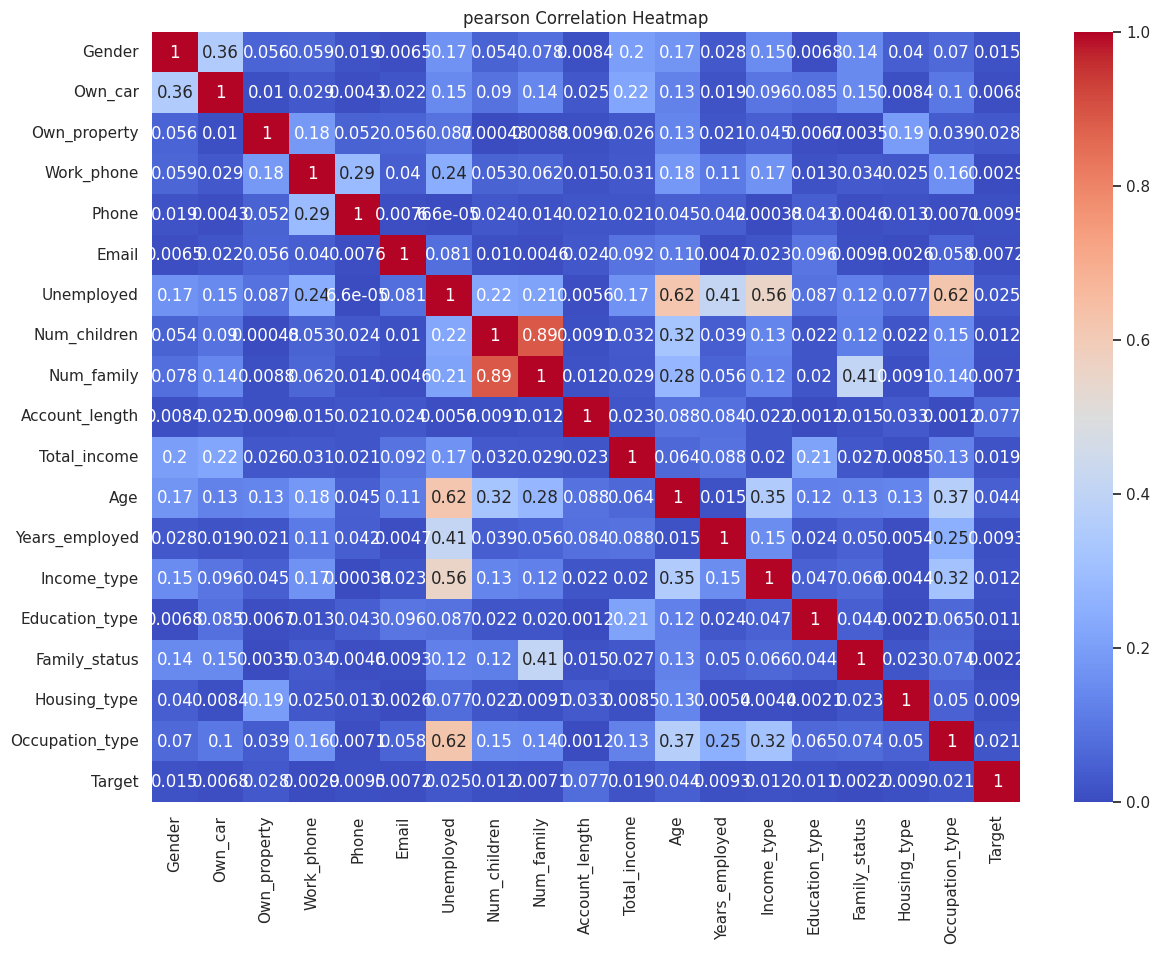

In [ ]:
corr_matrix = df_encoded.corr().abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("pearson Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Pearson| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

Highly correlated pairs (|Pearson| > 0.8):
Num_family and Num_children: correlation = 0.89


Num_family contains the information from Num_children plus adults/other family, making it more general and informative.

In [ ]:
# Calculate variance for each numerical feature
numerical_df = df_encoded.select_dtypes(include=np.number)
variances = numerical_df.var()
print("Feature Variances:")
display(variances)

# Set a variance threshold (you can adjust this value)
variance_threshold = 0.01

# Identify numerical features with variance below the threshold
low_variance_numerical_features = variances[variances < variance_threshold].index.tolist()

print(f"\nNumerical features with variance below {variance_threshold}:")
print(low_variance_numerical_features)

# Drop low variance features from the original DataFrame
if low_variance_numerical_features:
    df_encoded = df_encoded.drop(columns=low_variance_numerical_features)
    print(f"\nDropped low variance numerical columns: {low_variance_numerical_features}")
else:
    print("\nNo numerical features found with variance below the threshold.")

display(df_encoded.info())

Feature Variances:


,0
Gender,2.271464e-01
Own_car,2.325207e-01
Own_property,2.205961e-01
Work_phone,1.701701e-01
Phone,2.049376e-01
Email,7.989128e-02
Unemployed,1.441839e-01
Num_children,5.883180e-01
Num_family,8.703363e-01
Account_length,2.771578e+02



Numerical features with variance below 0.01:
[]

No numerical features found with variance below the threshold.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Work_phone       9709 non-null   int64  
 4   Phone            9709 non-null   int64  
 5   Email            9709 non-null   int64  
 6   Unemployed       9709 non-null   int64  
 7   Num_children     9709 non-null   int64  
 8   Num_family       9709 non-null   int64  
 9   Account_length   9709 non-null   int64  
 10  Total_income     9709 non-null   float64
 11  Age              9709 non-null   float64
 12  Years_employed   9709 non-null   float64
 13  Income_type      9709 non-null   int64  
 14  Education_type   9709 non-null   int64 

None

In [ ]:
df_encoded = df_encoded.drop(['Num_children'], axis=1)
df_encoded.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,2,15,427500.0,32.868574,12.435574,0,2,2,1,2994,1
1,1,1,1,0,0,0,0,2,29,112500.0,58.793815,3.104787,0,0,0,0,182,0
2,0,0,1,0,1,1,0,1,4,270000.0,52.321403,8.353354,1,0,1,0,959,0
3,0,0,1,0,0,0,1,1,20,283500.0,61.504343,0.000000,2,2,3,0,2994,0
4,1,1,1,1,1,1,0,2,5,270000.0,46.193967,2.105450,0,2,0,0,300,0


In [ ]:
df_encoded.to_csv("Processed_Credit_Card_fradulent_data.csv", index=False)